# Gradient Descent Class
A gradient descent class to optimze a linear regression model

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## First making a custom dataset

In [3]:
from sklearn.datasets import make_regression
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=42)

In [5]:
df = pd.DataFrame(data={"feature": X.reshape(100), "target": y.reshape(100)})
df.head()

,feature,target
0,0.931280,62.687202
1,0.087047,-23.763981
2,-1.057711,-25.686766
3,0.314247,7.936457
4,-0.479174,-15.475495


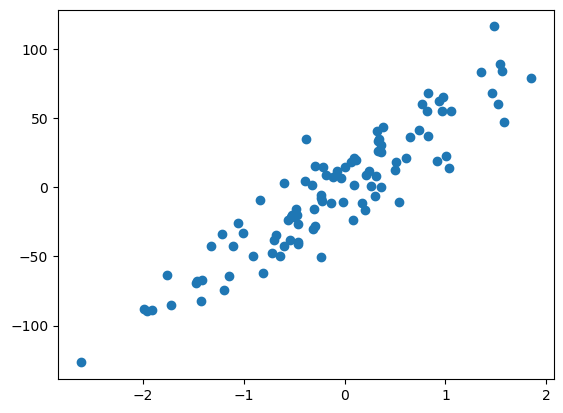

In [6]:
plt.scatter(X,y)

In [7]:
from sklearn.linear_model import LinearRegression


In [37]:
lr= LinearRegression()
lr.fit(X,y)

LinearRegression()

In [38]:
print(lr.coef_)
print(lr.intercept_)
# after using our own class, we'll check if our slop and intersept are near to these or not

[47.13323967]
2.3302306410539453


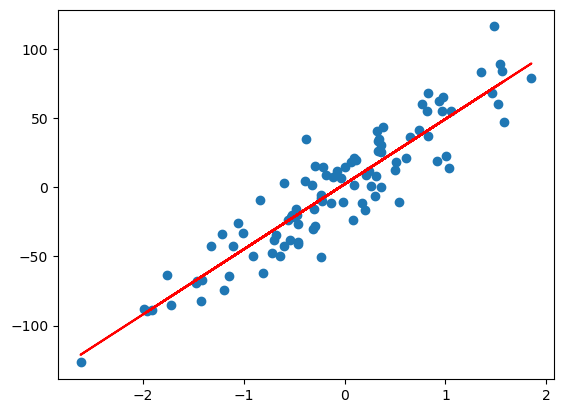

In [42]:
plt.scatter(X,y)
plt.plot(X,lr.predict(X), color="red");

## GDRegressor

In [47]:
class GDRegressor:
    
    def __init__(self, learning_rate, epochs):
        self.m = 100
        self.b = -120 # we'll start from very far
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,X,y):
        #calculate b (intercept) using Gradient Descent
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - self.m*X.ravel() - self.b)
            loss_slope_m = -2 * np.sum((y - self.m*X.ravel() - self.b) * X.ravel())
            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m)
        print(self.m, self.b)
        
    def predict(self, X):
        return self.m * X + self.b

### Making an object of GDRegressor

In [48]:
gd = GDRegressor(0.001, 40)

In [49]:
gd.fit(X,y)

47.133605249093485 2.318422139762551


As you can see, the answer from our class is really close to actual answer

## Using different learning rates and epochs to compare

### Using less epochs

In [66]:
gd_bad = GDRegressor(0.001, 10)
gd_bad.fit(X,y)

51.82601255700532 -9.444671599512054


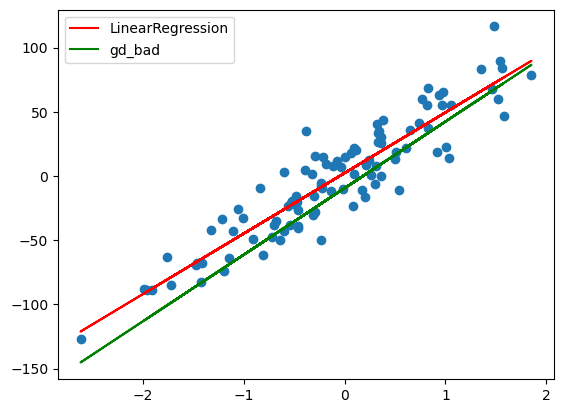

In [68]:
# showing the actual line we calculated using LinearRegression
# along with the line calculated using our object gd_bad

y_bad_pred = gd_bad.predict(X)

plt.scatter(X,y)
plt.plot(X, lr.predict(X), color="red", label="LinearRegression")
plt.plot(X, y_bad_pred, color="green", label="gd_bad")
plt.legend();

As you can see, the line from gd_bad is far from the line we calculated using LinearRegression class. However, it's not that far, that means that if we give our model some more ephocs, it might give accurate results.

### Using more epochs

In [70]:
gd_good = GDRegressor(0.001, 50)
gd_good.fit(X,y)

47.13289689712929 2.328931854967976


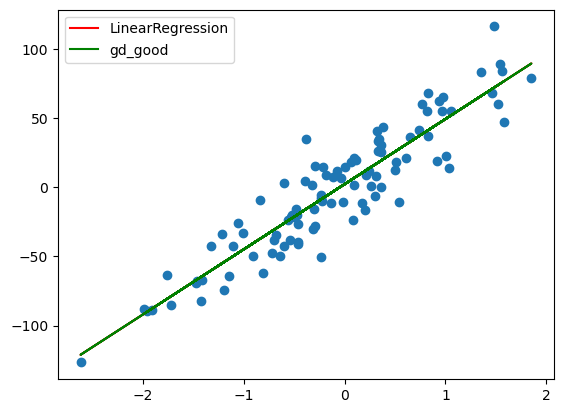

In [72]:
# showing the actual line we calculated using LinearRegression
# along with the line calculated using our object gd_good

y_good_pred = gd_good.predict(X)

plt.scatter(X,y)
plt.plot(X, lr.predict(X), color="red", label="LinearRegression")
plt.plot(X, y_good_pred, color="green", label="gd_good")
plt.legend();

As you can see, our line completely overlaps the line form `LinearRegression` class.

---

## Thank you!